<div class='alert alert-info' style='text-align: center;'><h1>YOLOv5 Chest X-Ray Anatomy Detection - Train</h1>
</div>

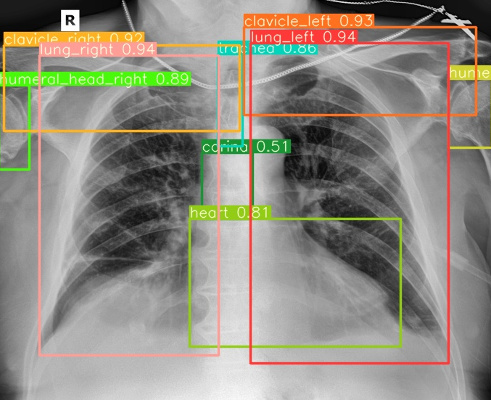

- This notebook trains on a custom dataset that I hand annotated from the SIIM-Covid19 challenge dataset. The images are 640px JPGs with CLAHE processing.
- I used https://makesense.ai to label 10 classes of anatomical structures on 100 images. (left lung, right lung, left clavicle, right clavicle, left humeral head, right humeral head, trachea, carina, heart and gastric bubble).
- The dataset is here -> https://www.kaggle.com/davidbroberts/chest-anatomy-yolov5-train-set
- Images and labels are are split (80/20) train/test.
- I used the weights from this notebook in an inference notebook here -> https://www.kaggle.com/davidbroberts/cxr-anatomy-detection-with-yolov5
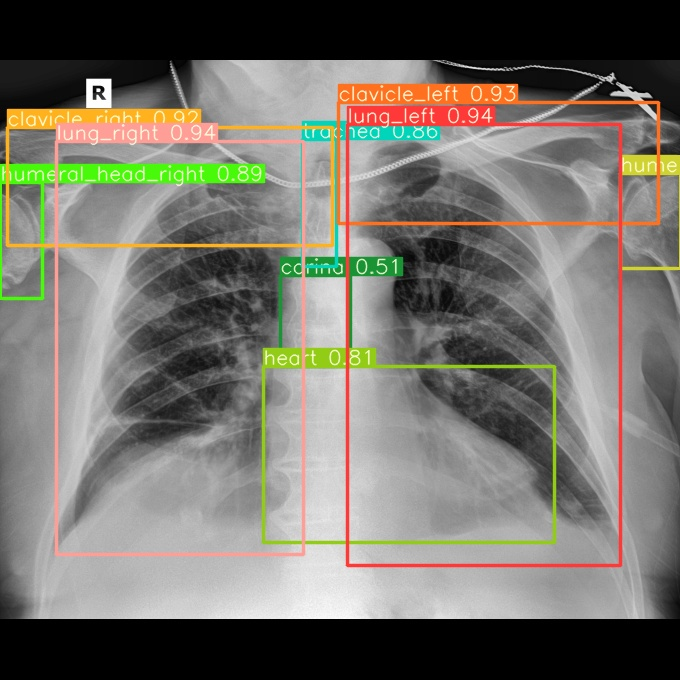

In [ ]:
import torch
from shutil import copyfile

In [ ]:
# Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
copyfile('../../input/chest-anatomy-yolov5-train-set/chest_anatomy_data.yaml', '/kaggle/working/yolov5/data/chest_anatomy_data.yaml')
!wandb off

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
# Train for 10 epochs, you'll lwant to increase this. I used 500 epohcs in my production model.
!python train.py --img 640 --batch 16 --epochs 10 --data chest_anatomy_data.yaml --weights yolov5s.pt --cache

In [ ]:
# Copy weights to working dir. Download this file and use it in your infer notebook.
copyfile('runs/train/exp/weights/best.pt', '/kaggle/working/chest_anatomy.pt')